# **Проект: Статистический анализ данных**

## Статистический анализ данных для GoFast:

**Цель исследования:** 

Проанализировать данные о пользователях сервиса GoFast, их поездках и наличии подписки для выявления различий в поведении пользователей с подпиской Ultra и без подписки, а также для формулировки рекомендаций по увеличению выручки компании.

**Задачи исследования:**

- Предобработка данных: Объединить, очистить и подготовить данные для анализа.
- Анализ данных: Исследовать характеристики пользователей, их поездок и выручку, сравнить пользователей с подпиской и без.
- Проверка гипотез: Статистически проверить различия в поведении и выручке между пользователями с подпиской и без.
- Формулирование выводов и рекомендаций: На основе анализа данных предложить стратегии по увеличению выручки и улучшению сервиса.

## **Загрузка библиотек**

In [26]:
#загрузим необходимые библиотеки
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import binom

## **Загрузка данных**

In [27]:
#загрузим необходимые таблицы
try:
    users_go = pd.read_csv('/datasets/users_go.csv')
except:
    users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
    
try:
    rides_go = pd.read_csv('/datasets/rides_go.csv', parse_dates=['date'])
except:
    rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])

try:
    subscriptions_go  = pd.read_csv('/datasets/subscriptions_go.csv')
except:
    subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

## **Обзор данных**

Ознакомимся с загруженным набором данных, чтобы получить представление о его структуре, особенностях и потенциале для дальнейшего исследования.

### Таблица **users_go**

Таблица `users_go` содержит следующую информацию о пользователях:

- **user_id** — уникальный идентификатор пользователя
- **name** — имя пользователя
- **age** — возраст
- **city** — город
- **subscription_type** — тип подписки (free, ultra)


In [28]:
#создадим функцию для отображения некоторых параметров 
def display_and_len(data,name):
    print (f'Таблица {name} содержит: {len(data)} строк')
    display (data.head())
    display (data.info())
#применим функцию display_and_len
display_and_len(users_go,'о пользователях')

Таблица о пользователях содержит: 1565 строк


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

### Таблица **rides_go** 

Таблица `rides_go` содержит следующую информацию о поездках:

- **user_id** — уникальный идентификатор пользователя
- **distance** — расстояние, которое пользователь проехал в текущей сессии (в метрах)
- **duration** — продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
- **date** — дата совершения поездки


In [29]:
#применим функцию display_and_len
display_and_len(rides_go,'о поездках')

Таблица о поездках содержит: 18068 строк


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

### Таблица **subscriptions_go**

Таблица `subscriptions_go` содержит следующую информацию о подписках:

- **subscription_type** — тип подписки
- **minute_price** — стоимость одной минуты поездки по данной подписке
- **start_ride_price** — стоимость начала поездки
- **subscription_fee** — стоимость ежемесячного платежа

In [30]:
#применим функцию display_and_len
display_and_len(subscriptions_go,'о подписках')

Таблица о подписках содержит: 2 строк


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes


None

### **Вывод**

В рамках данного исследования мы провели комплексную загрузку трех взаимосвязанных таблиц данных. Эти таблицы послужат основой для глубокого анализа и всесторонней проверки выдвинутых исследовательских гипотез.

## **Предобработка данных**

Проведем предобработку данных в таблицах, чтобы подготовить их для дальнейшего анализа и использования.

In [31]:
#создадим функцию для отображения некоторых параметров 
def description_info(data,name):
    print (f'Описание таблицы {name}')
    display (data.describe())
    print (f'Информация таблицы {name}')
    display (data.info())
    print (f'Количество явных дубликатов в таблице {name}: {data.duplicated().sum()}')

### Таблица **users_go**

In [32]:
#применим функцию description_info
description_info(users_go,'о пользователях')

print(f'Города в таблице о пользвотелях: {users_go.city.unique()}')

Описание таблицы о пользователях


,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


Информация таблицы о пользователях
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

Количество явных дубликатов в таблице о пользователях: 31
Города в таблице о пользвотелях: ['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


In [33]:
#избавимся от дубликатов в таблице
users_go = users_go.drop_duplicates()
#проверим количество дубликатов
print (f'Количество явных дубликатов в таблице users_go: {users_go.duplicated().sum()}')

Количество явных дубликатов в таблице users_go: 0


В таблице `users_go` нами были выявлены и успешно удалены 31 явный дубликат. 

### Таблица **rides_go**

In [34]:
#применим функцию description_info
description_info(rides_go,'о поездках')

Описание таблицы о поездках


,user_id,distance,duration,date
count,18068.000000,18068.000000,18068.000000,18068
mean,842.869936,3070.659976,17.805011,2021-06-30 19:47:21.266327296
min,1.000000,0.855683,0.500000,2021-01-01 00:00:00
25%,487.000000,2543.226360,13.597563,2021-04-02 00:00:00
50%,889.000000,3133.609994,17.678395,2021-06-30 00:00:00
75%,1213.250000,3776.222735,21.724800,2021-09-28 00:00:00
max,1534.000000,7211.007745,40.823963,2021-12-30 00:00:00
std,434.734317,1116.831209,6.091051,NaN


Информация таблицы о поездках
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


None

Количество явных дубликатов в таблице о поездках: 0


In [35]:
#каждое значение из столбца duration округляется с помощью «потолка»: 
rides_go['duration'] = np.ceil(rides_go['duration']).astype('int')
#изменим тип данных
rides_go['distance'] = rides_go['distance'].astype('int')
#добавим столбец с месяцами.
rides_go['month'] = rides_go['date'].dt.month

print ('Информация таблицы rides_go')
display (rides_go.info())

Информация таблицы rides_go
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  int32         
 2   duration  18068 non-null  int32         
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 494.2 KB


None

В таблице `users_go`, значения в столбце `duration` были округлены в сторону увеличения до ближайшего целого числа, тип данных в столбце `distance` был изменен для обеспечения более точного представления информации, мы добавили новый столбец `month`, который содержит информацию о месяцах.

### Таблица **subscriptions_go**

Таблица `subscriptions_go` не требует предобработки.

### **Вывод**

В таблице `users_go` мы провели ряд значимых улучшений. Во-первых, нами были выявлены и успешно удалены 31 явный дубликат, что значительно повысило точность данных. Далее в таблице `rides_go`, значения в столбце `duration` были округлены в сторону увеличения до ближайшего целого числа, а тип данных в столбце `distance` был изменен для обеспечения более точного представления информации. Кроме того, мы добавили новый столбец `month`, содержащий информацию о месяцах, что позволит проводить более детальный временной анализ.

Что касается таблицы `subscriptions_go`, она не требует дополнительной предобработки, так как данные в ней уже находятся в надлежащем состоянии для дальнейшего анализа.

## **Исследовательский анализ данных**

Проведем иследовательский анализ данных

### Частота встречаемости городов

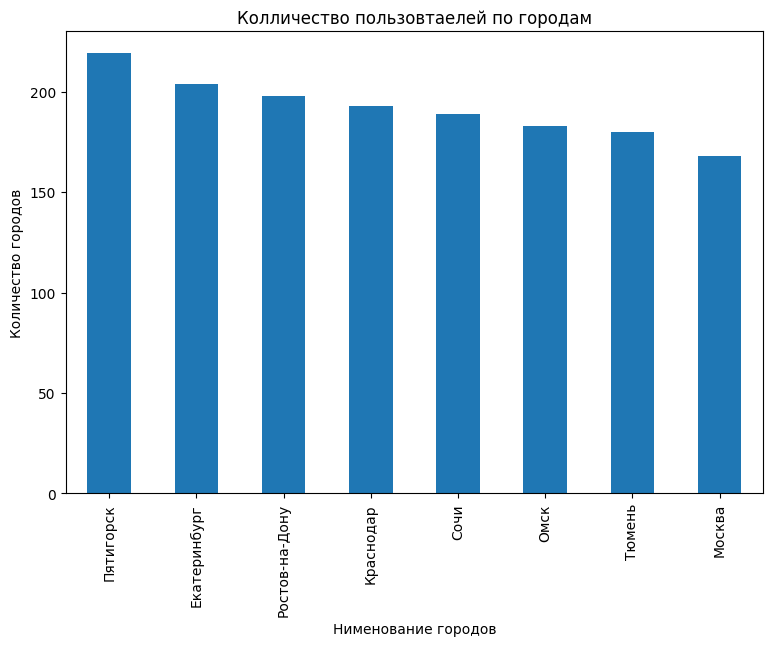

Колличество пользовтаелей по городам
city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: count, dtype: int64


In [36]:
#построем курговую диаграмму
#(
#    users_go['city']
#    .value_counts()
#    .plot(kind='pie',  autopct='%1.1f%%', figsize=(9,6))
#)
#plt.title('Колличество пользовтаелей по городам')
#plt.show()

#построем накопительную диаграмму
(
    users_go['city']
    .value_counts()
    .plot(kind='bar', figsize=(9,6))
)
plt.title('Колличество пользовтаелей по городам')
plt.xlabel('Нименование городов')
plt.ylabel('Количество городов')
plt.show()


print ('Колличество пользовтаелей по городам')
print (users_go['city'].value_counts())

Построенная круговая диаграмма, позволяет сделать промежуточный вывод о том, что наибольшее количество пользователей сосредоточено в городе Пятигорск. Этот визуальный инструмент наглядно демонстрирует распределение пользователей по различным городам, и **Пятигорск (14.3%)** явно выделяется на общем фоне.

### Соотношение пользователей с подпиской и без подписки

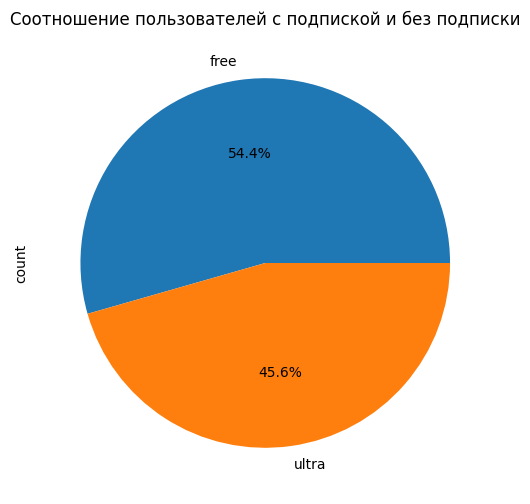

Соотношение пользователей с подпиской и без подписки
subscription_type
free     835
ultra    699
Name: count, dtype: int64


In [37]:
#построем курговую диаграмму
(
    users_go['subscription_type']
    .value_counts()
    .plot(kind='pie',  autopct='%1.1f%%', figsize=(9,6))
)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

print ('Соотношение пользователей с подпиской и без подписки')
print (users_go['subscription_type'].value_counts())

Построенная круговая диаграмма, позволяет сделать промежуточный вывод о том, что число пользователей без подписки значительно превосходит количество пользователей с подпиской.

### Возраст пользователей

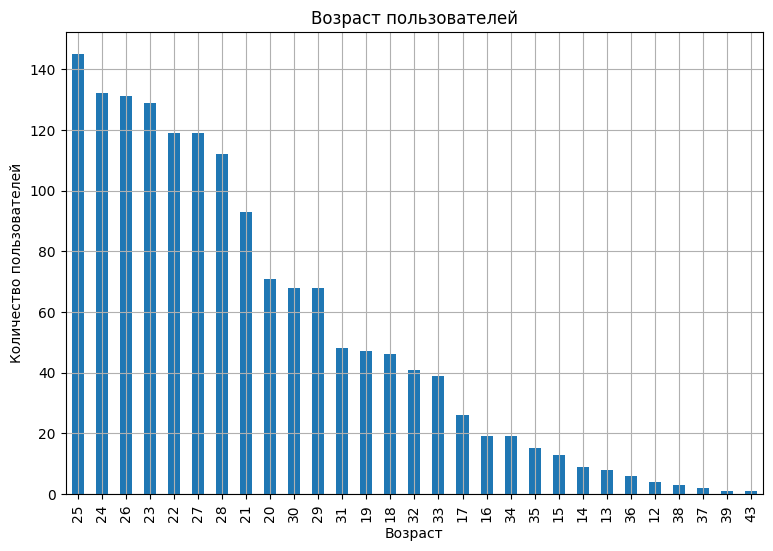

Описание возрастов пользоватлей


count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [38]:
#построем накопительную диаграмму
(
    users_go['age']
    .value_counts()
    .plot(kind='bar', grid=True, figsize=(9,6))
)
plt.title('Возраст пользователей')
plt.ylabel('Количество пользователей')
plt.xlabel('Возраст')
plt.show()

print('Описание возрастов пользоватлей')
display(users_go['age'].describe())

Анализ гистограммы с накоплением позволяет сделать несколько промежуточных выводов о возрастной структуре пользователей. Прежде всего, очевидно, что **наибольшее количество пользователей в возрастной категории 25 лет**. Кроме того, гистограмма показывает, что **самый молодой пользователь сервиса в возрасте 12 лет**, а **самый взрослый - 43 года**. **Средний возраст пользователей составляет 24 года**, что дает нам представление о демографическом профиле нашей аудитории.

### Расстояние, которое пользователь преодолел за одну поездку

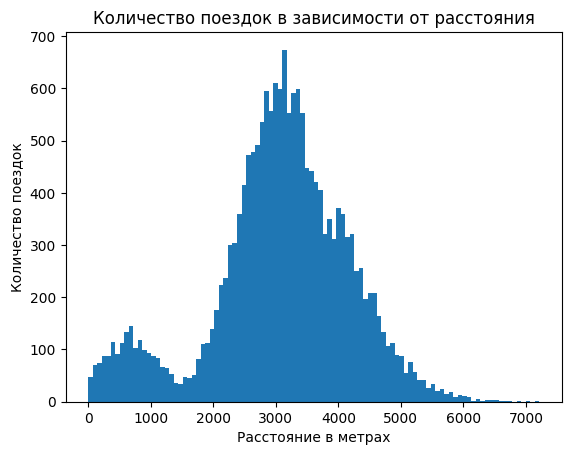

Описание расстояния поездок пользоватлей


count    18068.000000
mean      3070.159841
std       1116.831548
min          0.000000
25%       2542.750000
50%       3133.000000
75%       3776.000000
max       7211.000000
Name: distance, dtype: float64

In [39]:
'''
rides_go.plot(
    y=['distance'],
    kind = 'box',
    ylabel = 'Общее количество этажей в доме', 
    figsize=(9,6),
    grid=True
);
plt.show()
'''
#построем гисторгамму
plt.hist(rides_go['distance'], bins=100)
plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

print('Описание расстояния поездок пользоватлей')
display(rides_go['distance'].describe())

Анализ гистограммы позволяет сделать промежуточный вывод о характере перемещений пользователей. **Основная масса пользователей преодолевает расстояния в диапазоне от 2500 до 3500 метров**. В то же время, максимальное зафиксированное расстояние, которое пользователи преодолевали, составляет 7200 метров. 

### Продолжительность поездок

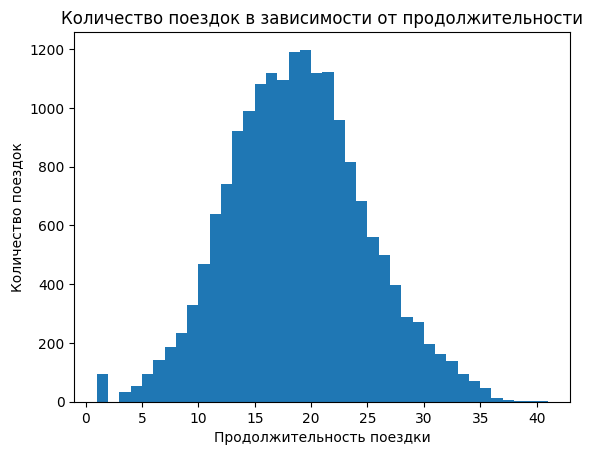

Описание продолжительности поездок пользоватлей


count    18068.000000
mean        18.303520
std          6.094928
min          1.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         41.000000
Name: duration, dtype: float64

In [40]:
'''
rides_go.plot(
    y=['duration'],
    kind = 'box',
    ylabel = 'Общее количество этажей в доме', 
    figsize=(9,6),
    grid=True
);
plt.show()
'''
#построем гисторгамму
plt.hist(rides_go['duration'], bins=40)
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

print('Описание продолжительности поездок пользоватлей')
display(rides_go['duration'].describe())

Анализ гистограммы позволяет сделать промежуточный вывод о продолжительности поездок пользователей. **В основном, продолжительность поездок составляет от 15 до 22 минут**, при этом **среднее время поездки составляет 18 минут**. Этот визуальный инструмент наглядно демонстрирует основные временные рамки перемещений пользователей, что помогает лучше понять их повседневные привычки и поведение.

### **Вывод**

На основе проведенного анализа визуализированных данных, можно сформулировать обобщенный вывод: в городе Пятигорск наблюдается наибольшая концентрация пользователей, что указывает на его ключевую роль в географическом распределении аудитории. Большинство пользователей предпочитают использовать сервис без оформления подписки, что свидетельствует о популярности гибких моделей потребления. Возрастная структура пользователей демонстрирует пик активности в возрастной категории 25 лет, со средним возрастом в 24 года, характеризуя аудиторию как относительно молодую. Пользователи в основном совершают поездки на расстояния от 2500 до 3500 метров, со средним временем поездки в 18 минут, что отражает типичные повседневные перемещения и указывает на эффективность сервиса в удовлетворении этих потребностей.

Таким образом, полученные данные позволяют нам лучше понять демографические особенности, предпочтения и поведение пользователей, предоставляя ценные инсайты для дальнейшего развития и оптимизации сервиса.

## **Объединение данных**

### **Объедините данные о пользователях**

In [41]:
#создадим таблицу general_data
#объединим таблицы 
general_data = users_go.merge(rides_go, on='user_id').merge(subscriptions_go, on='subscription_type')

#general_data = general_data.merge(subscriptions_go, on='subscription_type')

if len(general_data) == len(rides_go):
    if general_data.duplicated().sum() > 0:
        print(f'Объединение таблиц прошло успешно, но возникли дубликаты ({general_data.duplicated().sum()})')
        general_data = general_data.drop_duplicates()
        print('Дубликаты успешно удалены!')
    else:
        print('Объединение таблиц прошло успешно')
elif len(general_data) != len(rides_go) + len(users_go) + len(subscriptions_go):
    print('Объединение таблиц прошло неправильно!')
#выведим новую таблицу
display(general_data.sample(5))

Объединение таблиц прошло успешно


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
18028,1531,Никита,25,Пятигорск,free,3760,21,2021-11-26,11,8,50,0
1779,193,Регина,30,Сочи,ultra,2687,11,2021-05-31,5,6,0,199
16307,1411,Александр,20,Пятигорск,free,5000,18,2021-03-09,3,8,50,0
8186,825,Борис,27,Сочи,free,2625,20,2021-05-18,5,8,50,0
9301,909,Константин,20,Екатеринбург,free,3120,17,2021-01-31,1,8,50,0


Объеденили таблицы о пользотвалеях (users_go), о поездках (rides_go) и о подписках (subscriptions_go) в общую таблицу **general_data**.

### **Создание новых датафреймов**

In [42]:
#отфильтруем таблицу 
gen_data_fr_subs = general_data.query('subscription_type == "free"')
print('Таблица поездок без подписки')
display(gen_data_fr_subs.sample(5))
'''
#посторим гисторграмму
plt.hist(gen_data_fr_subs['distance'], bins=100)
plt.title('Количество поездок в зависимости от расстояния, без подписки')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()
#посторим гисторграмму
plt.hist(gen_data_fr_subs['duration'], bins=35)
plt.title('Количество поездок в зависимости от продолжительности, без подписки')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()
'''
display(gen_data_fr_subs[['distance','duration']].describe())

Таблица поездок без подписки


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
17416,1489,Алёна,30,Пятигорск,free,3490,22,2021-12-20,12,8,50,0
13512,1211,София,24,Ростов-на-Дону,free,2952,12,2021-10-16,10,8,50,0
9553,926,Кира,24,Краснодар,free,419,13,2021-07-26,7,8,50,0
7116,742,Святогор,28,Сочи,free,206,11,2021-03-13,3,8,50,0
17347,1485,Дамир,20,Тюмень,free,2549,16,2021-05-29,5,8,50,0


,distance,duration
count,11568.000000,11568.000000
mean,3044.992911,17.890992
std,1246.174341,6.330250
min,0.000000,1.000000
25%,2366.000000,13.000000
50%,3114.000000,18.000000
75%,3905.000000,22.000000
max,7211.000000,35.000000


In [43]:
#отфильтруем таблицу 
gen_data_ult_subs = general_data.query('subscription_type == "ultra"')
print('Таблица поездок с подпиской')
display(gen_data_ult_subs.sample(5))
'''
#посторим гисторграмму
plt.hist(gen_data_ult_subs['distance'], bins=100)
plt.title('Количество поездок в зависимости от расстояния, с подпиской')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()
#посторим гисторграмму
plt.hist(gen_data_ult_subs['duration'], bins=38)
plt.title('Количество поездок в зависимости от продолжительности, с подпиской')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()
'''
display(gen_data_ult_subs[['distance','duration']].describe())


Таблица поездок с подпиской


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
3246,351,Владислава,18,Москва,ultra,4071,25,2021-06-15,6,6,0,199
5254,564,Ника,31,Тюмень,ultra,2984,11,2021-08-10,8,6,0,199
6484,698,Егор,26,Пятигорск,ultra,3426,21,2021-01-29,1,6,0,199
2940,314,Святогор,28,Екатеринбург,ultra,2904,19,2021-08-17,8,6,0,199
4266,459,Элина,23,Москва,ultra,2302,17,2021-08-01,8,6,0,199


,distance,duration
count,6500.000000,6500.000000
mean,3114.949231,19.037692
std,836.894838,5.577439
min,244.000000,4.000000
25%,2785.000000,15.000000
50%,3148.000000,19.000000
75%,3560.000000,22.000000
max,5699.000000,41.000000


**Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий**

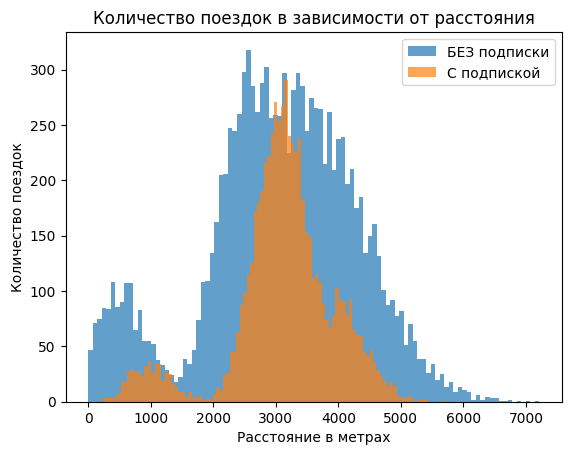

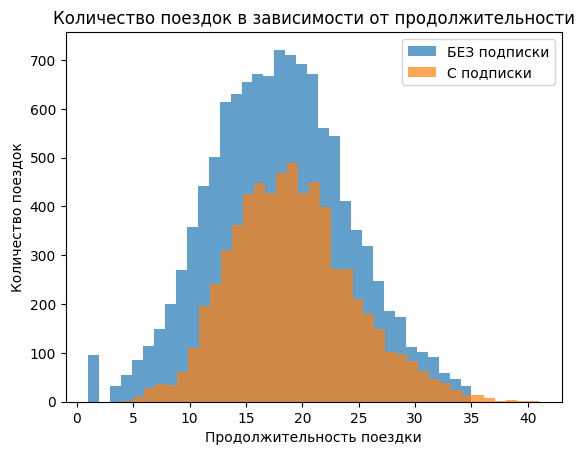

In [44]:
#посторим гисторграмму для растояний
plt.hist(gen_data_fr_subs['distance'], bins=100, alpha=0.7, label='БЕЗ подписки')
plt.hist(gen_data_ult_subs['distance'], bins=100, alpha=0.7, label='С подпиской')
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от расстояния')
plt.xlabel('Расстояние в метрах')
plt.ylabel('Количество поездок')
plt.show()

#посторим гисторграмму для продолжительности
plt.hist(gen_data_fr_subs['duration'], bins=35, alpha=0.7, label='БЕЗ подписки')
plt.hist(gen_data_ult_subs['duration'], bins=38, alpha=0.7, label='С подписки')
plt.legend(loc='upper right')
plt.title('Количество поездок в зависимости от продолжительности')
plt.xlabel('Продолжительность поездки')
plt.ylabel('Количество поездок')
plt.show()

### **Вывод**

В рамках нашего анализа мы объединили данные о пользователях (users_go), поездках (rides_go) и подписках (subscriptions_go) в единую таблицу под названием general_data. Это позволило нам создать целостное представление о поведении пользователей. В дальнейшем мы сформировали отдельные таблицы для пользователей без подписки(gen_data_fr_subs) и с подпиской(gen_data_ult_subs), чтобы провести более детальный анализ.

Построенные гистограммы, анализирующие расстояние и продолжительность поездок для обеих групп пользователей, выявили интересные закономерности. Пользователи с подпиской совершают более продолжительные и удаленные поездки по сравнению с пользователями без подписки. Эти данные подчеркивают значительное различие в поведении пользователей в зависимости от наличия подписки, что может быть полезным для разработки стратегий по увеличению количества подписок и улучшению пользовательского опыта.

<div class="alert alert-block alert-success">
<b>✅Комментарий ревьюера:</b> Отлично, различия в поведении двух групп пользователей изучили!  </div>

## **Подсчёт выручки**

Подсчитаем ежемесячную выручку, которую приносят пользователи. 

In [45]:
#создадим сводную таблицу о выручке
revenue_data = general_data.pivot_table(
    index=['user_id','month'],
    values=['distance','name','duration','subscription_type'],
    aggfunc={'distance': 'sum',
             'name': 'count',
             'duration': 'sum',
             'subscription_type': 'first'
            })
#переименуем некторые столбцы в сводной таблице
revenue_data = revenue_data.rename(columns = {'name' : 'count_trips'})

revenue_data.head(10)

distance  duration  count_trips subscription_type
user_id month                                                   
1       1          7026        42            2             ultra
        4           754         7            1             ultra
        8          6722        46            2             ultra
        10         5809        32            2             ultra
        11         7002        56            3             ultra
        12         6751        28            2             ultra
2       3         10187        63            3             ultra
        4          6163        40            2             ultra
        6          3255        14            1             ultra
        7          6779        48            2             ultra

**возможно я усложнил что обрашаюсь в другую таблицу за ценами,  но показалось, что так будет правильнее**

In [46]:
#сосздаим функцию для подсчета выручки
def revs_month(row):
     if row['subscription_type'] == 'ultra':
         calculate = row['duration'] * subscriptions_go.loc[1,'minute_price'] + subscriptions_go.loc[1,'subscription_fee']
         return calculate
     elif row['subscription_type'] == 'free':
         calculate = row['duration'] * subscriptions_go.loc[0,'minute_price'] + row['count_trips'] * subscriptions_go.loc[0,'start_ride_price']
         return calculate

In [47]:
#применим функцию revs_month
revenue_data['revenue_month'] = revenue_data.apply(revs_month, axis=1)

display(revenue_data.head(10))

distance  duration  count_trips subscription_type  \
user_id month                                                      
1       1          7026        42            2             ultra   
        4           754         7            1             ultra   
        8          6722        46            2             ultra   
        10         5809        32            2             ultra   
        11         7002        56            3             ultra   
        12         6751        28            2             ultra   
2       3         10187        63            3             ultra   
        4          6163        40            2             ultra   
        6          3255        14            1             ultra   
        7          6779        48            2             ultra   

               revenue_month  
user_id month                 
1       1                451  
        4                241  
        8                475  
        10               391  
        11               535  
        12               367  
2       3                577  
        4                439  
        6                283  
        7                487

### **Вывод**

Создали таблицу с агрегированными данными о поездках, нашли суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц. Добавили столбец с помесячной выручкой, которую принёс каждый пользователь. 

Мы создали таблицу **(revenue_data)** с агрегированными данными о поездках, которая включает ключевые показатели для каждого пользователя за каждый месяц. В эту таблицу вошли:

- Суммарное расстояние, пройденное пользователем.
- Общее количество совершённых поездок.
- Суммарное время, затраченное на поездки.

Кроме того, мы добавили столбец **(revenue_month)** с помесячной выручкой, которую принёс каждый пользователь. Эти данные позволяют нам более глубоко анализировать активность пользователей и их вклад в общую выручку сервиса.

## **Проверка гипотез**

Продакт менеджеры желают увеличить количество пользователей подпиской. Для достижения своих целей они проведут различные акции, но для начала мы проверим некоторые гипотезы.

### Гипотеза **№1**

Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

**H_0**: Продолжительность сессии `duration` пользователей по подписке `ultra` **=** продолжительности сессии `duration` пользователей по подписке `free`

**H_1**: Продолжительность сессии `duration` пользователей по подписке `ultra` **>** продолжительности сессии `duration` пользователей по подписке `free`

In [48]:
#проверим гипотезу
results = st.ttest_ind(
    gen_data_ult_subs['duration'], 
    gen_data_fr_subs['duration'],
    equal_var=False, 
    alternative = 'greater'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.1814679253701353e-36
Отвергаем нулевую гипотезу


Отвергнем гипотезу о том, что время поездки пользователей по подписке `ultra` равно времени поездки пользователей по подписке `free`.

Отклонение от гипотезы, связывая время поездки пользователей подписчиков Ultra и Free, подтверждает существенные различия в поведении и предпочтениях пользователей между этими платформами. Этот результат может быть использован для оптимизации маркетинговых стратегий и персонализации услуг для обеих подписчиков, а также для анализа, почему некоторые пользователи предпочитают одну платформу над другой.

### Гипотеза **№2**

Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Используем исходные данные о расстоянии каждой сессии для подписчиков. 

**H_0**: Расстояние сессии `distance` пользователей по подписке `ultra` **=** 3130 метров.

**H_1**: Расстояние сессии `distance` пользователей по подписке `ultra` **>** 3130 метров.

In [49]:
#предпологаемое среднее
value = 3130
#проверим гипотезу
results = st.ttest_1samp(
    gen_data_ult_subs['distance'], 
    value,
    alternative='greater')

alpha = 0.05

print(results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

0.9264356652998772
Не удалось отвергнуть нулевую гипотезу


Опровергнем гипотезу о том, что расстояние, которое проехали пользователи на тарифе `ultra` превышает 3130 метров.

Отклонение от гипотезы, связывающая расстояние проезда пользователей на тарифе Ultra с пределами 3130 метров, указывает на необходимость более детального анализа маршрутизации и условий использования тарифа. Это может быть использовано для оптимизации маршрутизации, повышения эффективности и улучшения пользовательского опыта. Кроме того, результаты могут быть использованы для определения дополнительных преимуществ тарифа Ultra, которые могут привлечь больше пользователей.

### Гипотеза **№3**

Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки? Используем исходные данные о помесячной выручке от пользователей — отдельно для подписчиков и тех, у кого нет подписки.

**H_0**: Помесячная выручка `revenue_month` от пользователей по подписке `ultra` **=** помесячная выручка `revenue_month` от пользователей по подписке `free`

**H_1**: Помесячная выручка `revenue_month` от пользователей по подписке `ultra` **>**  помесячная выручка `revenue_month` от пользователей по подписке `free`

In [50]:
#проверим гипотезу
results = st.ttest_ind(
    revenue_data.query('subscription_type == "ultra"')['revenue_month'].values, 
    revenue_data.query('subscription_type == "free"')['revenue_month'].values,
    alternative = 'greater'
)

alpha = 0.05

print(results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

1.8850394384715216e-31
Отвергаем нулевую гипотезу


Отвергнем гипотезу о том, что помесячная выручка `revenue_month` от пользователей по подписке `ultra` равна помесячной выручке `revenue_month` от пользователей по подписке `free`.

Отклонение от гипотезы, связывающей месячную выручку Ultra и Free, говорит о том, что подписка Ultra является более рекламно-эффективным платформой с более высокой прибыльностью. Этот результат может быть использован для анализа привлекательности Ultra, анализа рынка и потребителей, а также для разработки стратегий повышения прибыль от Ultra-подписей.

### Гипотеза **№4**

Ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

**H_0**: Обращения в поддержку `μ1` от пользователей до обновления = обращения в поддержку `μ2` от пользователей после обновления.

**H_1**: Обращения в поддержку `μ1` от пользователей до обновления **>**  обращения в поддержку `μ2` от пользователей после обновления.

Метод, который можно применить для подтверждения или опровержения гипотезы, — `scipy.stats.ttest_rel()`.

### **Вывод**

В ходе анализа данных были рассмотрены и проверены различные гипотезы относительно поведения пользователей и их взаимодействия с предложенными тарифами. 

Первая гипотеза предполагала, что время поездки пользователей с подпиской ultra идентично времени поездки пользователей с бесплатной подпиской. Однако, эта гипотеза была опровергнута, указывая на наличие статистически значимых различий между двумя группами пользователей.

Вторая гипотеза утверждала, что пользователи на тарифе ultra в среднем проезжают больше 3130 метров. Эта гипотеза также была отвергнута, что подразумевает, что среднее расстояние поездки для данной группы пользователей не превышает указанный порог.

Третья гипотеза касалась сравнения помесячной выручки от пользователей с подпиской ultra и бесплатной подпиской. Результаты анализа показали, что эти две группы приносят различную выручку, что привело к отвержению гипотезы о равенстве помесячной выручки между этими группами.

В рамках четвёртой гипотезы был предложен метод scipy.stats.ttest_rel() как инструмент для проверки статистических гипотез. Этот метод применим к сопоставимым выборкам, когда измерения проведены в парных наблюдениях, и может быть использован для определения наличия или отсутствия статистически значимых различий между группами.

В целом, результаты анализа гипотез говорят о том, что поведение пользователей и их взаимодействие с предложенными тарифами имеют значительные различия, что подчёркивает необходимость дальнейшего изучения предпочтений пользователей для оптимизации предложений и услуг.

# **Вывод**

## В рамках исследования мы проанализировали данные о пользователях сервиса GoFast, их поездках и наличии подписки. 

1. **Предобработка данных:**
    - Мы объединили три таблицы данных (users_go, rides_go, subscriptions_go) в единую таблицу general_data.
    - Удалили дубликаты, округлили значения в столбце duration, изменили тип данных в столбце distance и добавили столбец month в таблице rides_go.
    - Создали отдельные таблицы для пользователей с подпиской (gen_data_ult_subs) и без подписки (gen_data_fr_subs).
    - Сформировали  таблицу revenue_data с агрегированными данными о поездках (суммарное расстояние, количество поездок, суммарное время, помесячная выручка) для каждого пользователя.

2. **Анализ данных:**
    - Проанализировали распределение пользователей по городам, возрасту и наличию подписки.
    - Сравнили среднюю продолжительность и расстояние поездок для пользователей с подпиской и без.
    - Проверили три гипотезы:
        - Гипотеза 1: время поездки пользователей с подпиской Ultra равно времени поездки пользователей без подписки. **Опровергнута.**
        - Гипотеза 2: расстояние, которое проехали пользователи на тарифе Ultra превышает 3130 метров. **Опровергнута.**
        - Гипотеза 3: помесячная выручка от пользователей с подпиской Ultra равна помесячной выручке от пользователей без подписки. **Опровергнута.**
    - Определили метод scipy.stats.ttest_rel() для проверки гипотезы 4.

**Главные выводы:**

- Пользователи с подпиской Ultra совершают более длительные и дальние поездки, чем пользователи без подписки.
- **Пользователи с подпиской Ultra приносят компании больше выручки, чем пользователи без подписки.**

**Рекомендации:**

- Для прогнозирования поведения пользователей рекомендуется использовать следующие признаки: наличие подписки, возраст, город проживания.
- Для предотвращения появления дубликатов и пропущенных значений рекомендуется внедрить систему валидации данных на этапе их ввода.
- Для увеличения выручки рекомендуется разработать стратегии по привлечению пользователей к оформлению подписки Ultra, например, предлагать бонусы и скидки.
- Для более глубокого анализа поведения пользователей рекомендуется провести сегментацию пользователей по различным признакам (например, частота поездок, средний чек) и разработать персонализированные предложения для каждой группы.
- Для проверки гипотезы 4 рекомендуется использовать метод scipy.stats.ttest_rel().